In [167]:
import os

os.sys.path.append(os.path.abspath('../src'))
from data import loader

import matplotlib.pyplot as plt
import pandas as pd

mapname = 'Town01'
figs_path = os.path.abspath(f'../results/figures/merged/{mapname}')

# Loading UAH-Driveset

The loader will concatenate all the normal and the aggressive drivers into a single dataframe. All the drivers are stacked and the timestamp is corrected to make it continuous

In [168]:
drivers = ['D1', 'D2', 'D3', 'D4', 'D5'] # List of drivers to load
uah = loader.read_data(drivers, os.path.abspath('../data/base/UAH-DRIVESET-v1'))
print(f"Loaded data for {len(drivers)} drivers.")
print(f"Sample rate in accelerometer data: {loader.get_samples_per_second(uah['acc'])} Hz")
print(f"Sample rate in GPS data: {loader.get_samples_per_second(uah['gps'])} Hz")

Loaded data for 5 drivers.
Sample rate in accelerometer data: 11.111111111111128 Hz
Sample rate in GPS data: 1.0204081632653057 Hz


In [169]:
uah['acc']['normal'].head()

,timestamp,acc_x,acc_y,acc_z,acc_x_KF,acc_y_KF,acc_z_KF,Roll,Pitch,Yaw,acc
0,6.94,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012,0.027092
1,7.03,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012,0.050259
2,7.14,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011,0.060737
3,7.24,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011,0.034015
4,7.34,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011,0.045662


In [170]:
uah['gps']['normal'].head()

,timestamp,speed,lat,lon,altitude,vert_accuracy,horiz_accuracy,course,difcourse
0,7.85,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.000
1,8.83,64.5,40.512924,-3.404577,612.5,4,5,331.9,0.000
2,9.82,63.6,40.513065,-3.404680,612.9,4,5,330.8,1.055
3,10.80,62.2,40.513210,-3.404772,613.3,4,5,330.8,1.055
4,11.80,60.9,40.513348,-3.404868,613.5,3,5,330.1,0.703


# Loading Synthetic Data

In [171]:
data = {}
carla_data, sumo_data = loader.load_synthetic_data(os.path.abspath(f'../data/synthetic/{mapname}'))

data['carla'] = carla_data
data['sumo'] = sumo_data

In [172]:
sumo_data['fixed']['traffic']['normal'].head()

,timestamp,x_pos,y_pos,speed,speed_x,speed_y,acc,acc_x,acc_y,angle,acc_diff,gyro_z
0,0.1,158.087185,287.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080721,0.000000,0.0
1,0.2,158.087187,287.511433,0.014326,0.014326,0.000020,0.143256,0.143256,0.000202,0.080721,1.432562,0.0
2,0.3,158.087193,287.515512,0.040790,0.040790,0.000057,0.264642,0.264642,0.000373,0.080721,0.264642,0.0
3,0.4,158.087205,287.524275,0.087632,0.087632,0.000123,0.468422,0.468421,0.000660,0.080721,2.037796,0.0
4,0.5,158.087228,287.540785,0.165100,0.165100,0.000233,0.774677,0.774676,0.001091,0.080721,3.062549,0.0


In [173]:
carla_data['fixed']['traffic']['normal'].head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,compass,latitude,longitude
0,0.0,0.000000,0.000000,10.049551,2.506499e-07,7.224422e-07,-2.983030e-11,270.025600,-0.001163,0.002435
1,0.1,0.000000,0.000000,10.023907,3.739554e-07,3.188071e-07,-1.417388e-11,270.025600,-0.001163,0.002435
2,0.2,0.000000,0.000000,9.941309,-7.549208e-07,3.603123e-07,6.137151e-11,270.025600,-0.001163,0.002435
3,0.3,0.000000,0.000000,9.880147,7.260266e-08,2.034537e-07,-1.464642e-11,270.025600,-0.001163,0.002435
4,0.4,0.618901,-0.001513,9.853028,9.126397e-07,-7.277709e-03,-7.636544e-05,270.025354,-0.001163,0.002435


In [174]:
def print_tree(d, prefix=''):
    """Recursively print a nested dictionary as an ASCII tree."""
    total = len(d)
    for i, (key, value) in enumerate(d.items()):
        is_last = i == total - 1
        branch = '└── ' if is_last else '├── '
        print(prefix + branch + str(key))

        new_prefix = prefix + ('    ' if is_last else '│   ')
        
        if isinstance(value, dict):
            print_tree(value, new_prefix)
        else:
            print(new_prefix + f'└── # samples: {len(value)}')

In [175]:
print_tree(data)

├── carla
│   ├── fixed
│   │   ├── no_traffic
│   │   │   ├── normal
│   │   │   │   └── # samples: 1443
│   │   │   └── aggressive
│   │   │       └── # samples: 1443
│   │   └── traffic
│   │       ├── normal
│   │       │   └── # samples: 1858
│   │       └── aggressive
│   │           └── # samples: 1993
│   └── llm
│       ├── no_traffic
│       └── traffic
│           ├── normal
│           │   └── # samples: 1913
│           └── aggressive
│               └── # samples: 1891
└── sumo
    ├── fixed
    │   ├── no_traffic
    │   │   ├── normal
    │   │   │   └── # samples: 18858
    │   │   └── aggressive
    │   │       └── # samples: 9381
    │   └── traffic
    │       ├── normal
    │       │   └── # samples: 11017
    │       └── aggressive
    │           └── # samples: 10944
    └── llm
        ├── no_traffic
        │   └── aggressive
        │       └── # samples: 10365
        └── traffic
            ├── normal
            │   └── # samples: 13046
            └── aggr

# Merging Datasets

Aside from training and testing only with Real and Synthetic data, we are also going to merge it in the following manner for fixed and LLM parameters:
- Real + SUMO
- Real + CARLA
- Real + SUMO + CARLA

The no_traffic version has been left out, since we want to test the simulators to their limits. 

In [176]:
print("CARLA sensors:", carla_data['fixed']['traffic']['normal'].keys().tolist())
print("SUMO sensors:", sumo_data['fixed']['traffic']['normal'].keys().tolist())
print("UAH-DRIVESET sensors:", uah['acc']['normal'].keys().tolist(), uah['gps']['normal'].keys().tolist())

CARLA sensors: ['timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'compass', 'latitude', 'longitude']
SUMO sensors: ['timestamp', 'x_pos', 'y_pos', 'speed', 'speed_x', 'speed_y', 'acc', 'acc_x', 'acc_y', 'angle', 'acc_diff', 'gyro_z']
UAH-DRIVESET sensors: ['timestamp', 'acc_x', 'acc_y', 'acc_z', 'acc_x_KF', 'acc_y_KF', 'acc_z_KF', 'Roll', 'Pitch', 'Yaw', 'acc'] ['timestamp', 'speed', 'lat', 'lon', 'altitude', 'vert_accuracy', 'horiz_accuracy', 'course', 'difcourse']


First, we need to define how the merging is going to take place, since we are looking at different sensors, based on the UAH-Driveset.

The most importants are `acc`, `gyro` (row, pitch and yaw), `speed` and `course` (compass / angle).

To merge with CARLA data, we can keep `acc`, `gyro` and `course`.

To merge with SUMO data, we can keep `acc`, `speed` and `course` 

To merge with CARLA and SUMO, we can only keep `acc` and `course`.

## Merging UAH's IMU and GNSS

First, we need to merge the two datasets in distinct frequencies. For that, we merge the acceleration with the gps using the nearset timestamp value.

In [177]:
# Using nearest to avoid issues with missing values in the data
merged_normal_uah = pd.merge_asof(uah['acc']['normal'], uah['gps']['normal'], on='timestamp', direction='nearest', suffixes=('_acc', '_gps'))
merged_aggressive_uah = pd.merge_asof(uah['acc']['aggressive'], uah['gps']['aggressive'], on='timestamp', direction='nearest', suffixes=('_acc', '_gps'))

# Adding the labels
merged_normal_uah['label'] = 'normal'
merged_aggressive_uah['label'] = 'aggressive'

In [178]:
merged_normal_uah.head()

,timestamp,acc_x,acc_y,acc_z,acc_x_KF,acc_y_KF,acc_z_KF,Roll,Pitch,Yaw,acc,speed,lat,lon,altitude,vert_accuracy,horiz_accuracy,course,difcourse,label
0,6.94,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012,0.027092,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0,normal
1,7.03,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012,0.050259,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0,normal
2,7.14,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011,0.060737,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0,normal
3,7.24,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011,0.034015,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0,normal
4,7.34,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011,0.045662,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0,normal


In [179]:
merged_normal_uah = merged_normal_uah.rename(columns={
    'Roll': 'gyro_x',
    'Pitch': 'gyro_y',
    'Yaw': 'gyro_z',
    'course': 'angle'
})

merged_aggressive_uah = merged_aggressive_uah.rename(columns={
    'Roll': 'gyro_x',
    'Pitch': 'gyro_y',
    'Yaw': 'gyro_z',
    'course': 'angle'
})

Now we must extract a portion of the UAH-driveset for validation, since the models will be tested on real data

In [180]:
validation_size = 0.2
total_size = len(merged_normal_uah) + len(merged_aggressive_uah)
n_validation_samples = int(total_size * validation_size) // 2 # Half for each type

validation_normal_uah = merged_normal_uah.iloc[:n_validation_samples]
validation_aggressive_uah = merged_aggressive_uah.iloc[:n_validation_samples]

merged_normal_uah = merged_normal_uah.iloc[n_validation_samples:]
merged_aggressive_uah = merged_aggressive_uah.iloc[n_validation_samples:]

training_set = pd.concat([merged_normal_uah, merged_aggressive_uah]).drop(columns=['timestamp'])
validation_set = pd.concat([validation_normal_uah, validation_aggressive_uah]).drop(columns=['timestamp'])

print(f"Validation set size: {len(validation_set)} samples")
print(f"Training set size: {len(training_set)} samples")

# Save the validation set
training_set.to_csv('../data/base/training_set_uah.csv')
validation_set.to_csv('../data/base/validation_set_uah.csv')

Validation set size: 36902 samples
Training set size: 147615 samples


Now saving the remaining data

In [181]:
def plot_side_by_side(df1, df2, columns, xlims, titles=('Dataset 1', 'Dataset 2'), figsize=(12, 4), output_path = None):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    for i, (df, ax, title) in enumerate(zip([df1, df2], axes, titles)):
        df[columns].plot(ax=ax)
        ax.set_title(title)
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Value')
        ax.legend(columns)
    # Set shared x/y limits
    ylims = [min(ax.get_ylim()[0] for ax in axes), max(ax.get_ylim()[1] for ax in axes)]
    for ax in axes:
        ax.set_xlim(xlims)
        ax.set_ylim(ylims)
    plt.tight_layout()

    if output_path is None:
        print("No output path provided, displaying plots instead.")
        plt.show()
    else:
        print(f"Saving plots to {output_path}")
        plt.savefig(output_path)

### Plotting

Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/uah/uah_acc.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/uah/uah_gyro.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/uah/uah_speed.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/uah/uah_angle.png


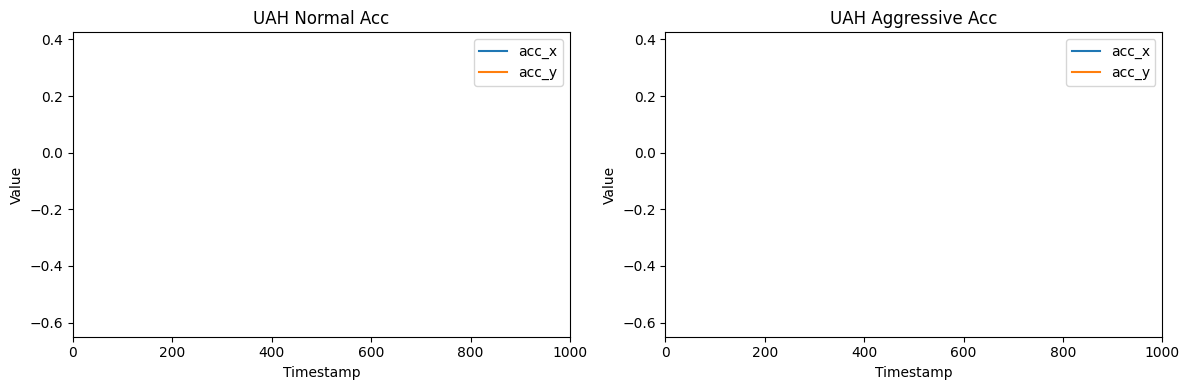

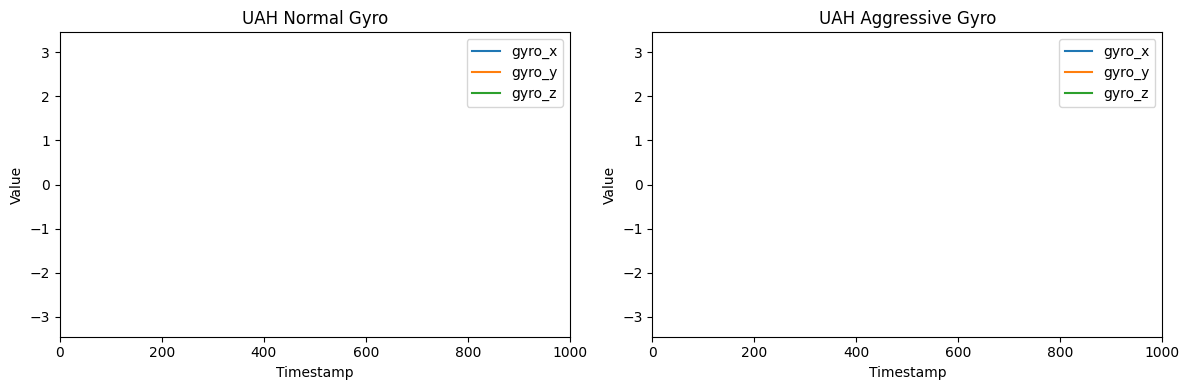

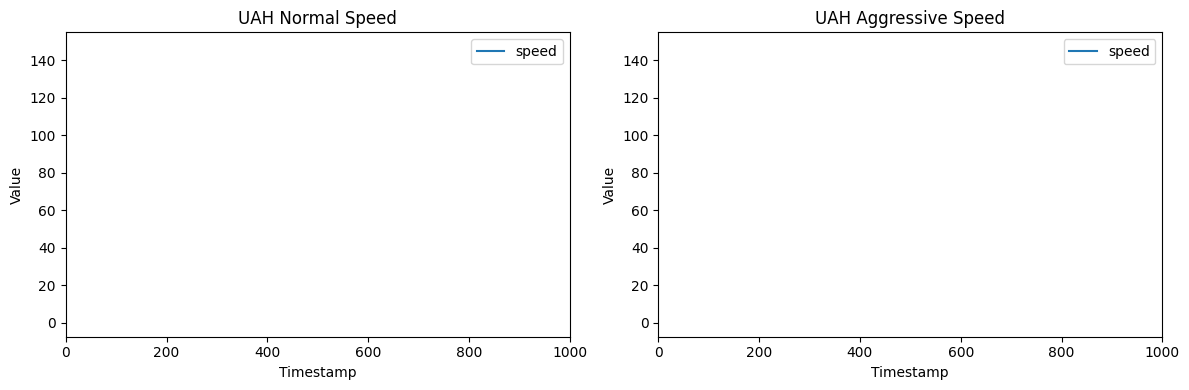

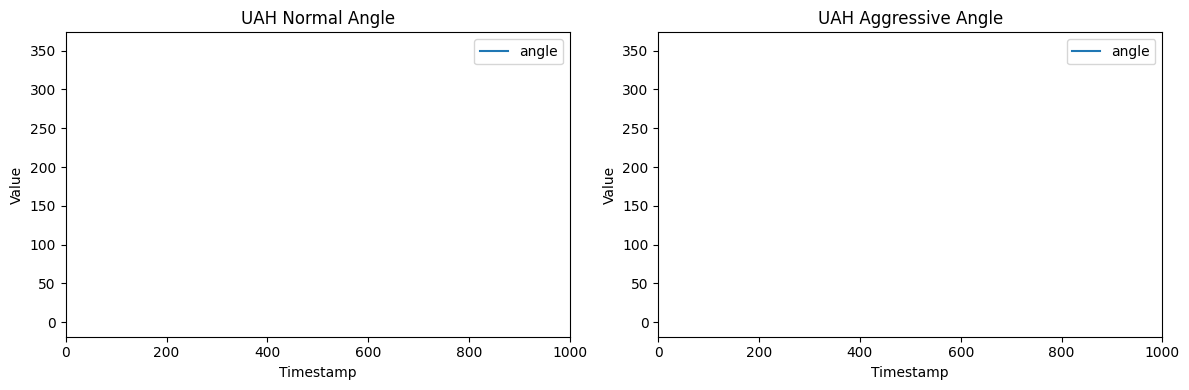

In [49]:
plot_side_by_side(
    merged_normal_uah, merged_aggressive_uah,
    columns=['acc_x', 'acc_y'],
    xlims=(0, 1000),
    titles=('UAH Normal Acc', 'UAH Aggressive Acc'),
    output_path=f'{figs_path}/uah/uah_acc.png'
)
plot_side_by_side(
    merged_normal_uah, merged_aggressive_uah,
    columns=['gyro_x', 'gyro_y', 'gyro_z'],
    xlims=(0, 1000),
    titles=('UAH Normal Gyro', 'UAH Aggressive Gyro'),
    output_path=f'{figs_path}/uah/uah_gyro.png'
)
plot_side_by_side(
    merged_normal_uah, merged_aggressive_uah,
    columns=['speed'],
    xlims=(0, 1000),
    titles=('UAH Normal Speed', 'UAH Aggressive Speed'),
    output_path=f'{figs_path}/uah/uah_speed.png'
)
plot_side_by_side(
    merged_normal_uah, merged_aggressive_uah,
    columns=['angle'],
    xlims=(0, 1000),
    titles=('UAH Normal Angle', 'UAH Aggressive Angle'),
    output_path=f'{figs_path}/uah/uah_angle.png'
)

## SUMO

In [182]:
# Note that acc are 10 Hz and angle/speed are 1 Hz in UAH-DRIVESET
merged_sumo_columns = ['acc_x', 'acc_y', 'angle', 'speed', 'label']

sumo_fixed_data_normal = sumo_data['fixed']['traffic']['normal']
sumo_fixed_data_aggressive = sumo_data['fixed']['traffic']['aggressive']
sumo_fixed_data_normal['label'] = 'normal'
sumo_fixed_data_aggressive['label'] = 'aggressive'
sumo_fixed_data_normal = sumo_fixed_data_normal[merged_sumo_columns]
sumo_fixed_data_aggressive = sumo_fixed_data_aggressive[merged_sumo_columns]

sumo_fixed_total = pd.concat([sumo_fixed_data_normal, sumo_fixed_data_aggressive], ignore_index=True)
sumo_fixed_total['origin'] = 'sumo'

sumo_llm_data_normal = sumo_data['llm']['traffic']['normal']
sumo_llm_data_aggressive = sumo_data['llm']['traffic']['aggressive']
sumo_llm_data_normal['label'] = 'normal'
sumo_llm_data_aggressive['label'] = 'aggressive'
sumo_llm_data_normal = sumo_llm_data_normal[merged_sumo_columns]
sumo_llm_data_aggressive = sumo_llm_data_aggressive[merged_sumo_columns]

sumo_llm_total = pd.concat([sumo_llm_data_normal, sumo_llm_data_aggressive], ignore_index=True)
sumo_llm_total['origin'] = 'sumo'

uah_normal_data_sumo = merged_normal_uah[merged_sumo_columns]
uah_aggressive_data_sumo = merged_aggressive_uah[merged_sumo_columns]
uah_data_sumo_total = pd.concat([uah_normal_data_sumo, uah_aggressive_data_sumo], ignore_index=True)
uah_data_sumo_total['origin'] = 'real'

print("UAH columns:", uah_normal_data_sumo.columns.tolist())
print("SUMO columns:", sumo_llm_total.columns.tolist())

UAH columns: ['acc_x', 'acc_y', 'angle', 'speed', 'label']
SUMO columns: ['acc_x', 'acc_y', 'angle', 'speed', 'label', 'origin']


Merging and saving the datasets

In [192]:
merged_sumo_uah_fixed = pd.concat([uah_data_sumo_total, sumo_fixed_total], ignore_index=True)
merged_sumo_uah_llm = pd.concat([uah_data_sumo_total, sumo_llm_total], ignore_index=True)

In [193]:
sumo_data_path = f'../data/merged/{mapname}/sumo'
sumo_fixed_total.to_csv(f'{sumo_data_path}/sumo_fixed_total.csv', index=False)
sumo_llm_total.to_csv(f'{sumo_data_path}/sumo_llm_total.csv', index=False)

sumo_merge_path = f'../data/merged/{mapname}/sumo_uah'
merged_sumo_uah_fixed.to_csv(f'{sumo_merge_path}/merged_sumo_uah_fixed.csv', index=False)
merged_sumo_uah_llm.to_csv(f'{sumo_merge_path}/merged_sumo_uah_llm.csv', index=False)

In [194]:
print("SUMO Fixed data shape:", sumo_fixed_total.shape)
print("SUMO LLM data shape:", sumo_llm_total.shape)
print("UAH data shape:", uah_data_sumo_total.shape)
print("----------")
print("Merged SUMO Fixed + UAH data shape:", merged_sumo_uah_fixed.shape)
print("Merged SUMO LLM + UAH data shape:", merged_sumo_uah_llm.shape)

SUMO Fixed data shape: (21961, 6)
SUMO LLM data shape: (25636, 6)
UAH data shape: (147615, 6)
----------
Merged SUMO Fixed + UAH data shape: (169576, 6)
Merged SUMO LLM + UAH data shape: (173251, 6)


### Plotting

In [141]:
xlims = (0, 1000)

Acceleration

Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/normal_fixed_acc.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/aggressive_fixed_acc.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/normal_llm_acc.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/aggressive_llm_acc.png


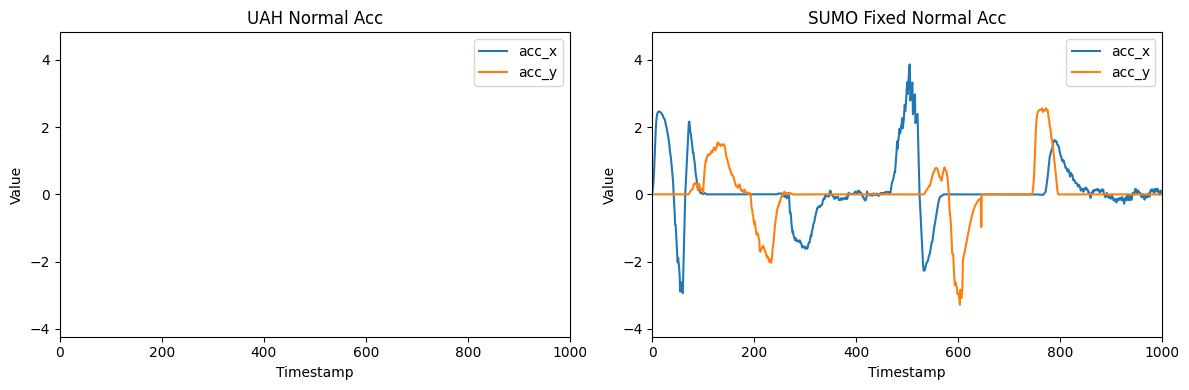

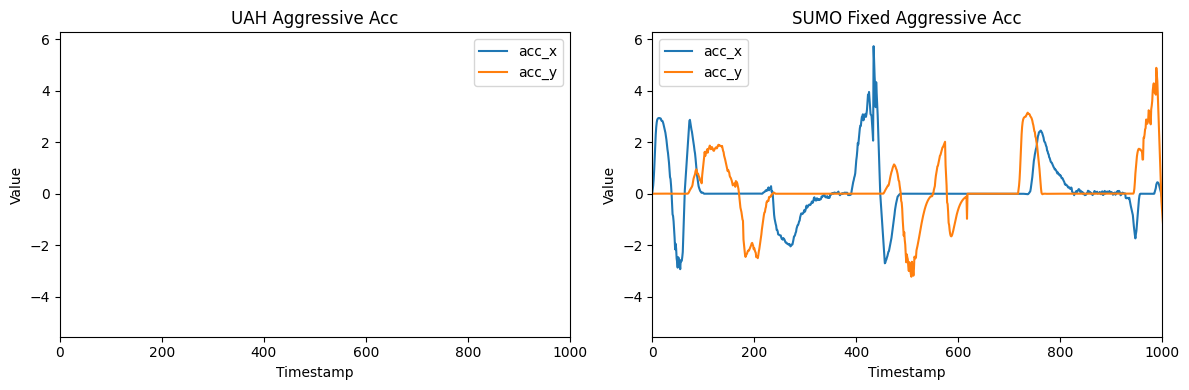

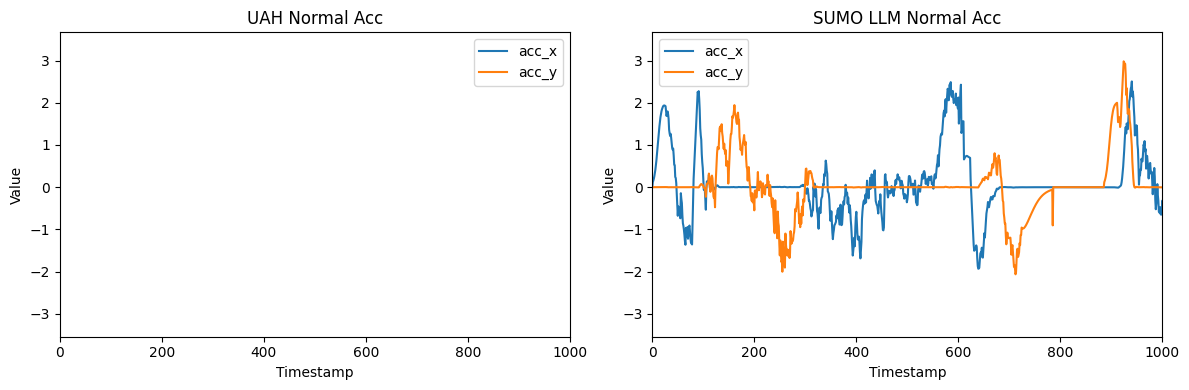

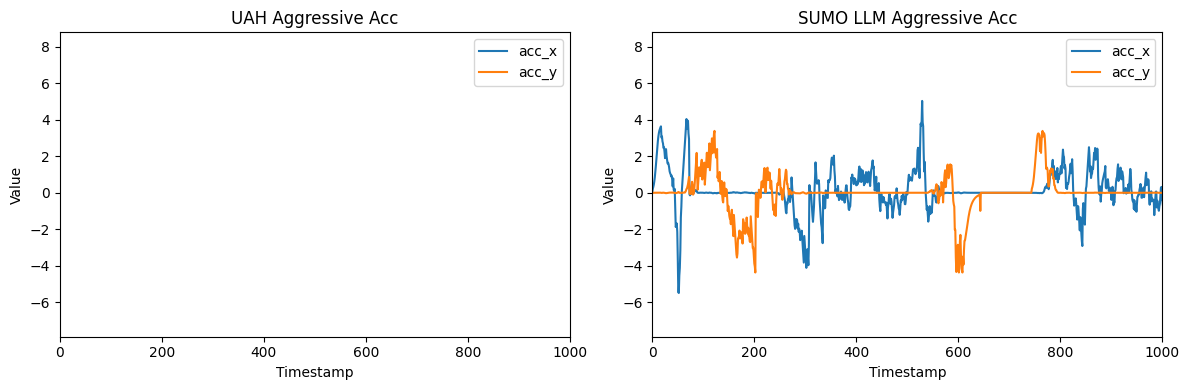

In [112]:
plot_side_by_side(
    uah_normal_data_sumo, sumo_fixed_data_normal,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Normal Acc', 'SUMO Fixed Normal Acc'),
    output_path=f'{figs_path}/sumo_uah/normal_fixed_acc.png'
)
plot_side_by_side(
    uah_aggressive_data_sumo, sumo_fixed_data_aggressive,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Aggressive Acc', 'SUMO Fixed Aggressive Acc'),
    output_path=f'{figs_path}/sumo_uah/aggressive_fixed_acc.png'
)
plot_side_by_side(
    uah_normal_data_sumo, sumo_llm_data_normal,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Normal Acc', 'SUMO LLM Normal Acc'),
    output_path=f'{figs_path}/sumo_uah/normal_llm_acc.png'
)
plot_side_by_side(
    uah_aggressive_data_sumo, sumo_llm_data_aggressive,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Aggressive Acc', 'SUMO LLM Aggressive Acc'),
    output_path=f'{figs_path}/sumo_uah/aggressive_llm_acc.png'
)

Speed

Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/normal_fixed_speed.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/aggressive_fixed_speed.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/normal_llm_speed.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/aggressive_llm_speed.png


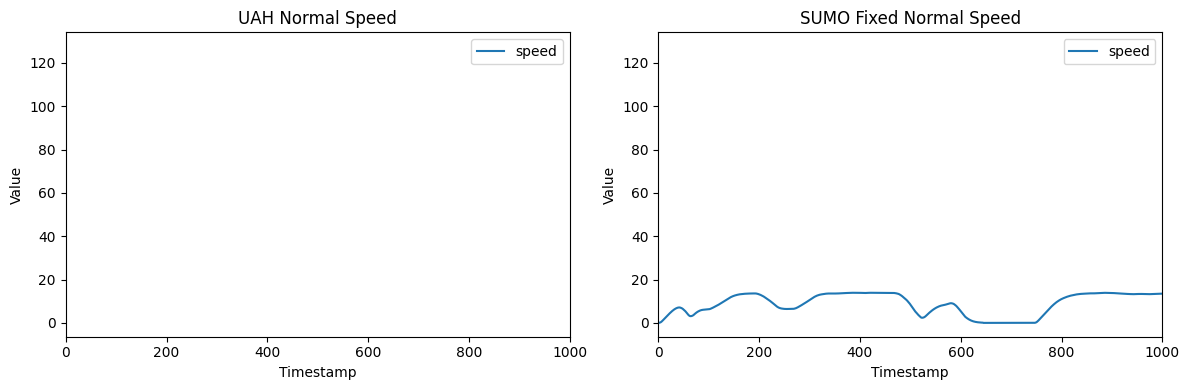

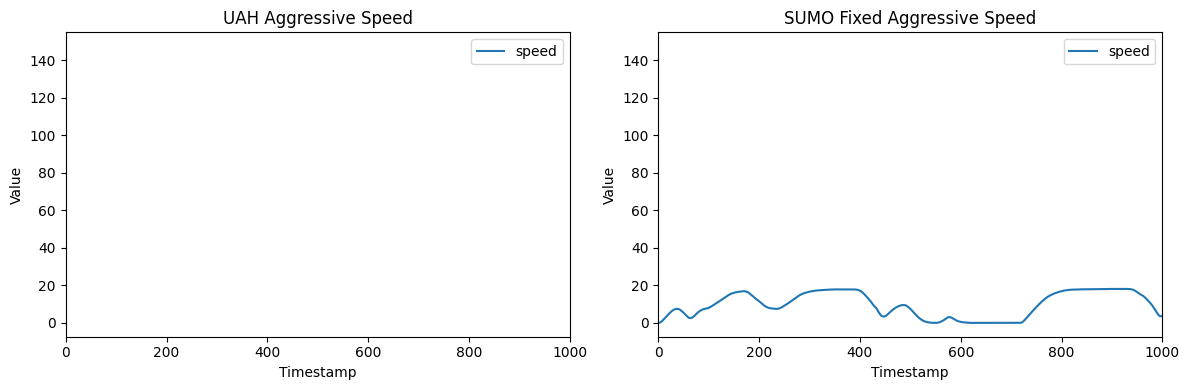

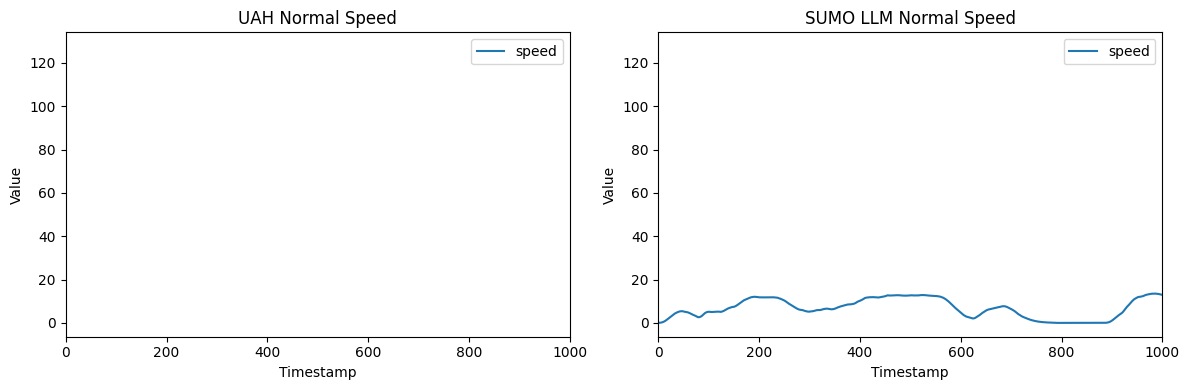

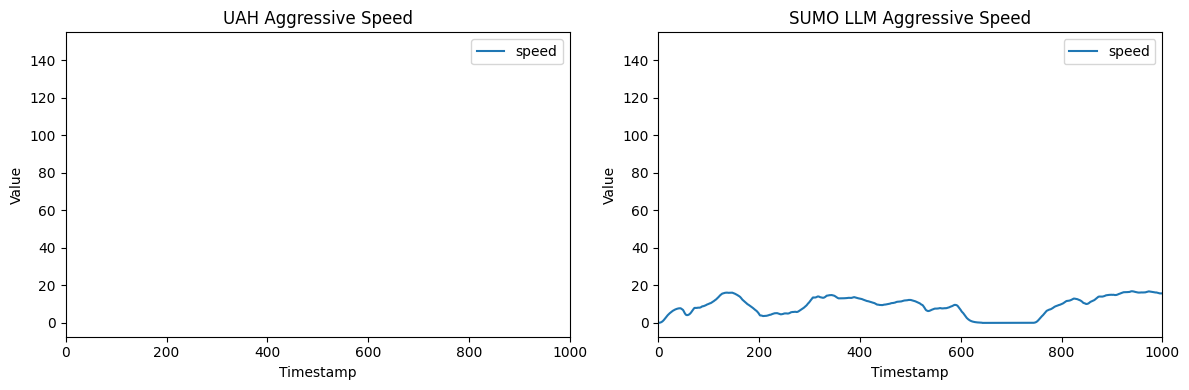

In [113]:
plot_side_by_side(
    uah_normal_data_sumo, sumo_fixed_data_normal,
    columns=['speed'],
    xlims=xlims,
    titles=('UAH Normal Speed', 'SUMO Fixed Normal Speed'),
    output_path=f'{figs_path}/sumo_uah/normal_fixed_speed.png'
)
plot_side_by_side(
    uah_aggressive_data_sumo, sumo_fixed_data_aggressive,
    columns=['speed'],
    xlims=xlims,
    titles=('UAH Aggressive Speed', 'SUMO Fixed Aggressive Speed'),
    output_path=f'{figs_path}/sumo_uah/aggressive_fixed_speed.png'
)
plot_side_by_side(
    uah_normal_data_sumo, sumo_llm_data_normal,
    columns=['speed'],
    xlims=xlims,
    titles=('UAH Normal Speed', 'SUMO LLM Normal Speed'),
    output_path=f'{figs_path}/sumo_uah/normal_llm_speed.png'
)
plot_side_by_side(
    uah_aggressive_data_sumo, sumo_llm_data_aggressive,
    columns=['speed'],
    xlims=xlims,
    titles=('UAH Aggressive Speed', 'SUMO LLM Aggressive Speed'),
    output_path=f'{figs_path}/sumo_uah/aggressive_llm_speed.png'
)

Angle

Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/normal_fixed_angle.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/aggressive_fixed_angle.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/normal_llm_angle.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/sumo_uah/aggressive_llm_angle.png


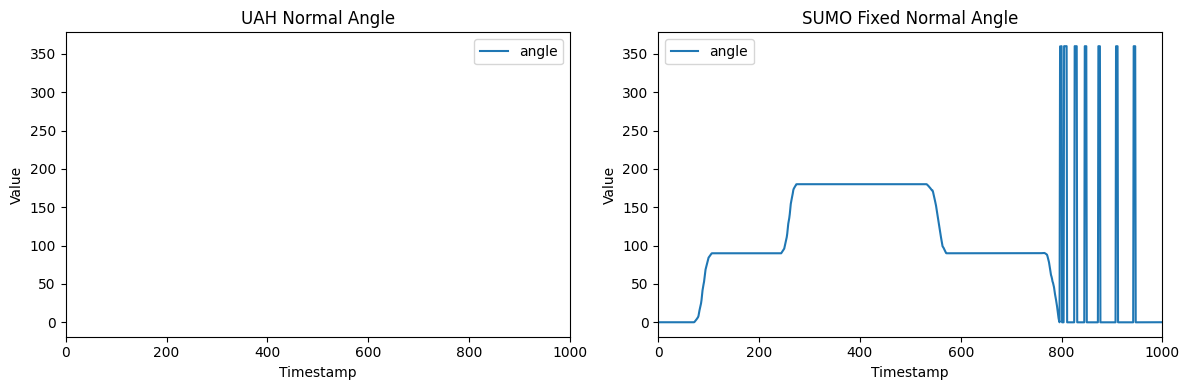

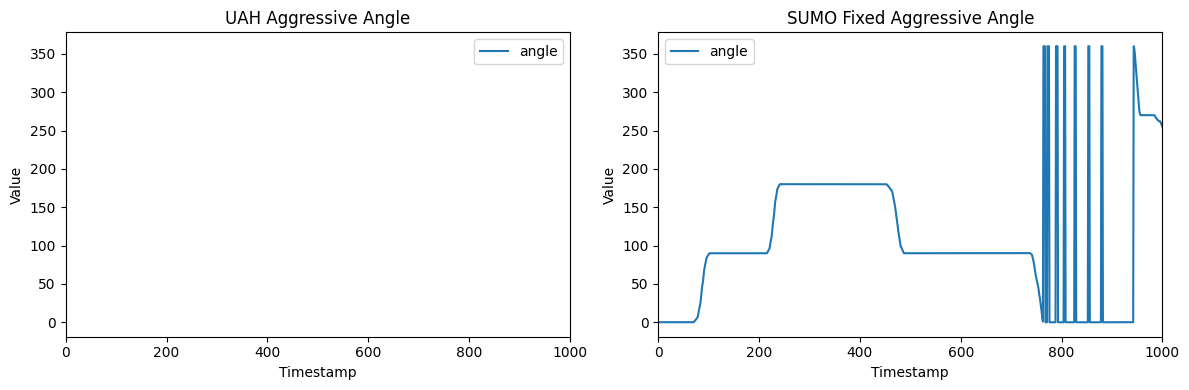

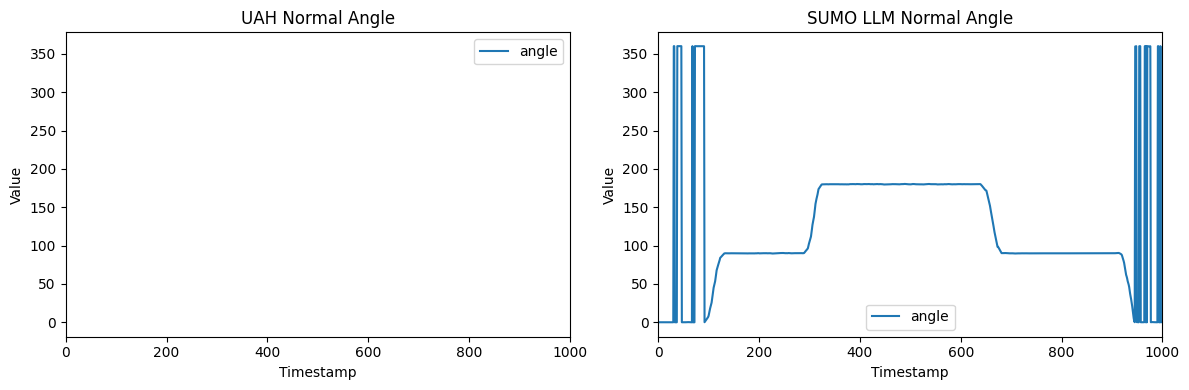

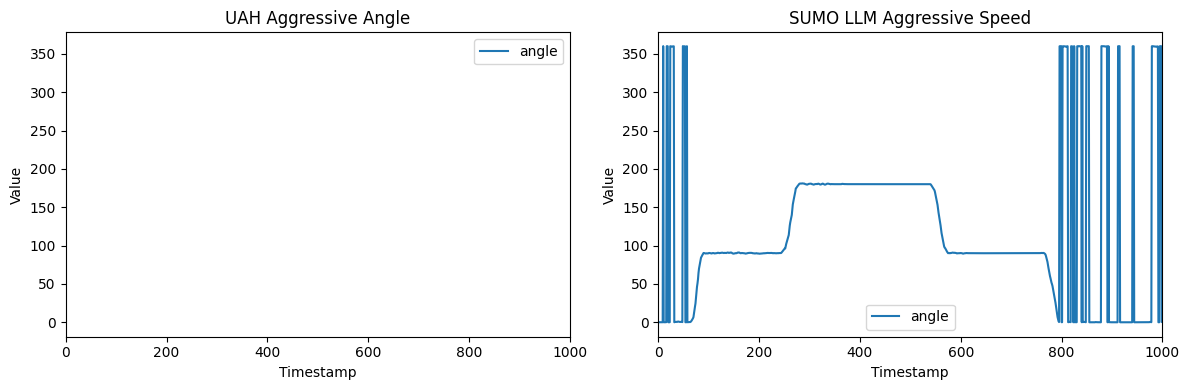

In [114]:
plot_side_by_side(
    uah_normal_data_sumo, sumo_fixed_data_normal,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Normal Angle', 'SUMO Fixed Normal Angle'),
    output_path=f'{figs_path}/sumo_uah/normal_fixed_angle.png'
)
plot_side_by_side(
    uah_aggressive_data_sumo, sumo_fixed_data_aggressive,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Aggressive Angle', 'SUMO Fixed Aggressive Angle'),
    output_path=f'{figs_path}/sumo_uah/aggressive_fixed_angle.png'
)
plot_side_by_side(
    uah_normal_data_sumo, sumo_llm_data_normal,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Normal Angle', 'SUMO LLM Normal Angle'),
    output_path=f'{figs_path}/sumo_uah/normal_llm_angle.png'
)
plot_side_by_side(
    uah_aggressive_data_sumo, sumo_llm_data_aggressive,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Aggressive Angle', 'SUMO LLM Aggressive Speed'),
    output_path=f'{figs_path}/sumo_uah/aggressive_llm_angle.png'
)

## CARLA

In [195]:
# Note that acc are 10 Hz and angle/speed are 1 Hz in UAH-DRIVESET
merged_carla_columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'angle', 'label']

carla_fixed_normal_data = carla_data['fixed']['traffic']['normal']
carla_fixed_aggressive_data = carla_data['fixed']['traffic']['aggressive']
carla_fixed_normal_data['label'] = 'normal'
carla_fixed_aggressive_data['label'] = 'aggressive'
carla_fixed_normal_data = carla_fixed_normal_data.rename(columns={'compass': 'angle'})[merged_carla_columns]
carla_fixed_aggressive_data = carla_fixed_aggressive_data.rename(columns={'compass': 'angle'})[merged_carla_columns]

carla_fixed_total = pd.concat([carla_fixed_normal_data, carla_fixed_aggressive_data], ignore_index=True)
carla_fixed_total['origin'] = 'carla'

carla_llm_normal_data = carla_data['llm']['traffic']['normal']
carla_llm_aggressive_data = carla_data['llm']['traffic']['aggressive']
carla_llm_normal_data['label'] = 'normal'
carla_llm_aggressive_data['label'] = 'aggressive'
carla_llm_normal_data = carla_llm_normal_data.rename(columns={'compass': 'angle'})[merged_carla_columns]
carla_llm_aggressive_data = carla_llm_aggressive_data.rename(columns={'compass': 'angle'})[merged_carla_columns]

carla_llm_total = pd.concat([carla_llm_normal_data, carla_llm_aggressive_data], ignore_index=True)
carla_llm_total['origin'] = 'carla'

uah_normal_data_carla = merged_normal_uah[merged_carla_columns]
uah_aggressive_data_carla = merged_aggressive_uah[merged_carla_columns]
uah_data_carla_total = pd.concat([uah_normal_data_carla, uah_aggressive_data_carla], ignore_index=True)
uah_data_carla_total['origin'] = 'real'

print("UAH columns:", uah_normal_data_carla.columns.tolist())
print("CARLA columns:", carla_fixed_normal_data.columns.tolist())

UAH columns: ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'angle', 'label']
CARLA columns: ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'angle', 'label']


Merging and saving the datasets

In [196]:
merged_carla_uah_fixed = pd.concat([uah_data_carla_total, carla_fixed_total], ignore_index=True)
merged_carla_uah_llm = pd.concat([uah_data_carla_total, carla_llm_total], ignore_index=True)

In [197]:
carla_data_path = f'../data/merged/{mapname}/carla'
carla_fixed_total.to_csv(f'{carla_data_path}/carla_fixed_total.csv', index=False)
carla_llm_total.to_csv(f'{carla_data_path}/carla_llm_total.csv', index=False)

carla_merge_path = f'../data/merged/{mapname}/carla_uah'
merged_carla_uah_fixed.to_csv(f'{carla_merge_path}/merged_carla_uah_fixed.csv', index=False)
merged_carla_uah_llm.to_csv(f'{carla_merge_path}/merged_carla_uah_llm.csv', index=False)

In [198]:
print("CARLA Fixed data shape:", carla_fixed_total.shape)
print("CARLA LLM data shape:", carla_llm_total.shape)
print("UAH data shape:", uah_data_carla_total.shape)
print("----------")
print("Merged CARLA Fixed + UAH data shape:", merged_carla_uah_fixed.shape)
print("Merged CARLA LLM + UAH data shape:", merged_carla_uah_llm.shape)

CARLA Fixed data shape: (3851, 9)
CARLA LLM data shape: (3804, 9)
UAH data shape: (147615, 9)
----------
Merged CARLA Fixed + UAH data shape: (151466, 9)
Merged CARLA LLM + UAH data shape: (151419, 9)


### Plotting

Acceleration

Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/normal_fixed_acc.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/aggressive_fixed_acc.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/normal_llm_acc.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/aggressive_llm_acc.png


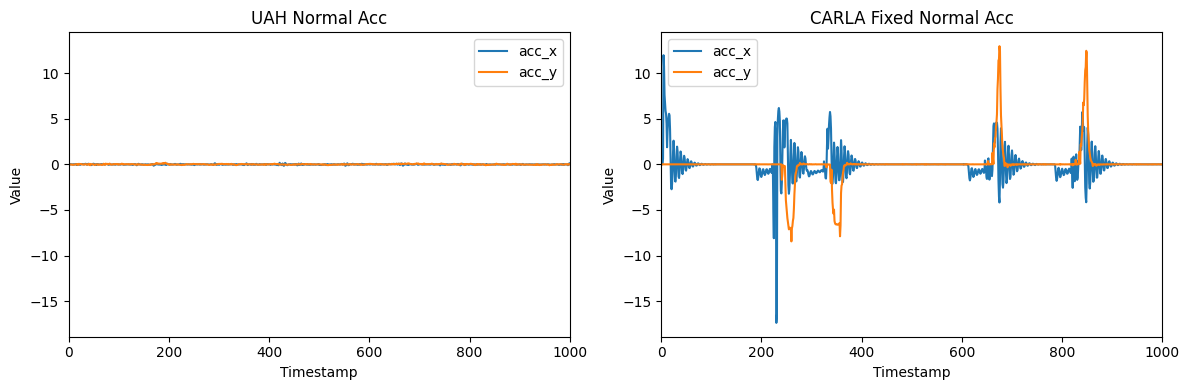

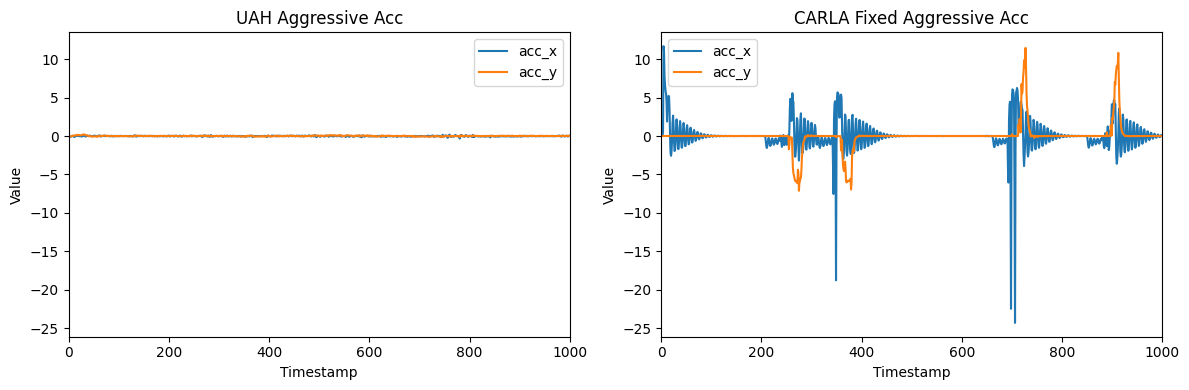

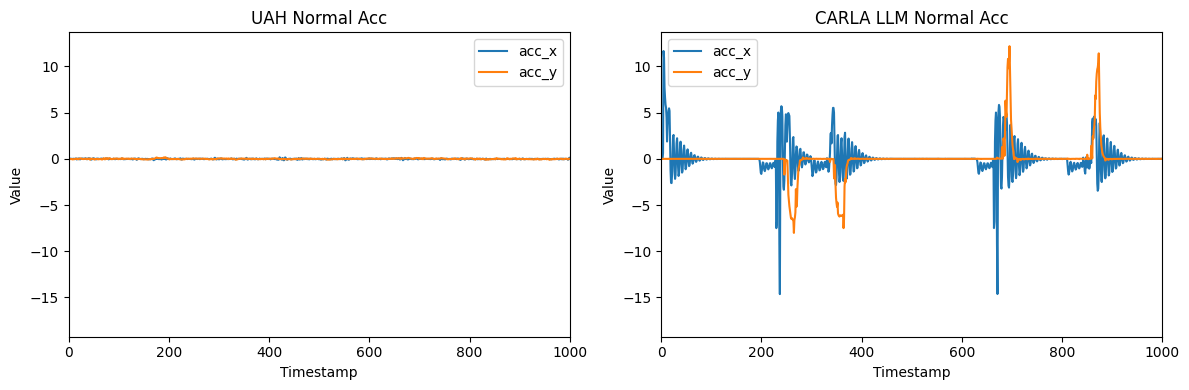

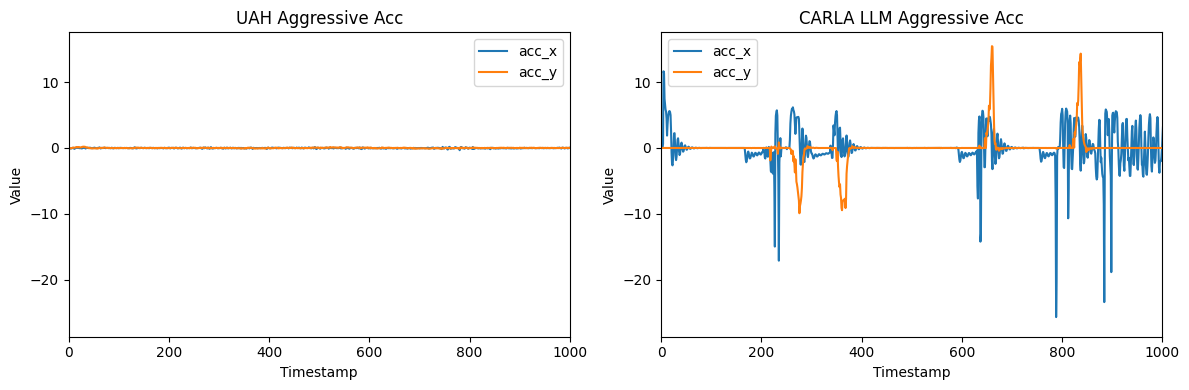

In [178]:
plot_side_by_side(
    uah_normal_data_carla, carla_fixed_normal_data,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Normal Acc', 'CARLA Fixed Normal Acc'),
    output_path=f'{figs_path}/carla_uah/normal_fixed_acc.png'
)
plot_side_by_side(
    uah_aggressive_data_carla, carla_fixed_aggressive_data,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Aggressive Acc', 'CARLA Fixed Aggressive Acc'),
    output_path=f'{figs_path}/carla_uah/aggressive_fixed_acc.png'
)
plot_side_by_side(
    uah_normal_data_carla, carla_llm_normal_data,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Normal Acc', 'CARLA LLM Normal Acc'),
    output_path=f'{figs_path}/carla_uah/normal_llm_acc.png'
)
plot_side_by_side(
    uah_aggressive_data_carla, carla_llm_aggressive_data,
    columns=['acc_x', 'acc_y'],
    xlims=xlims,
    titles=('UAH Aggressive Acc', 'CARLA LLM Aggressive Acc'),
    output_path=f'{figs_path}/carla_uah/aggressive_llm_acc.png'
)

Gyroscope

Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/normal_fixed_gyro.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/aggressive_fixed_gyro.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/normal_llm_gyro.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/aggressive_llm_gyro.png


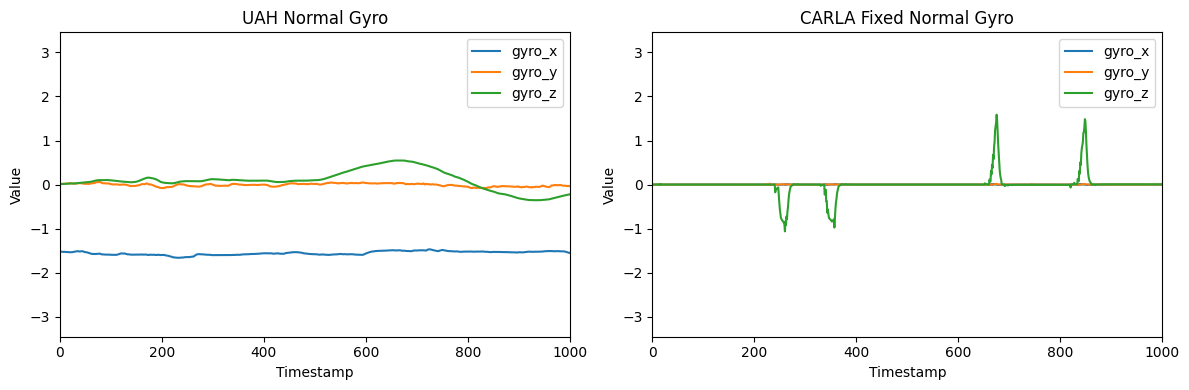

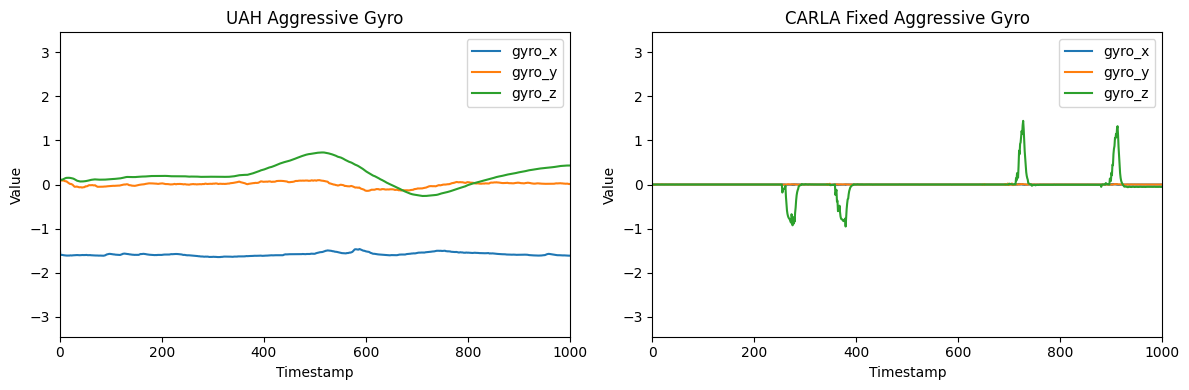

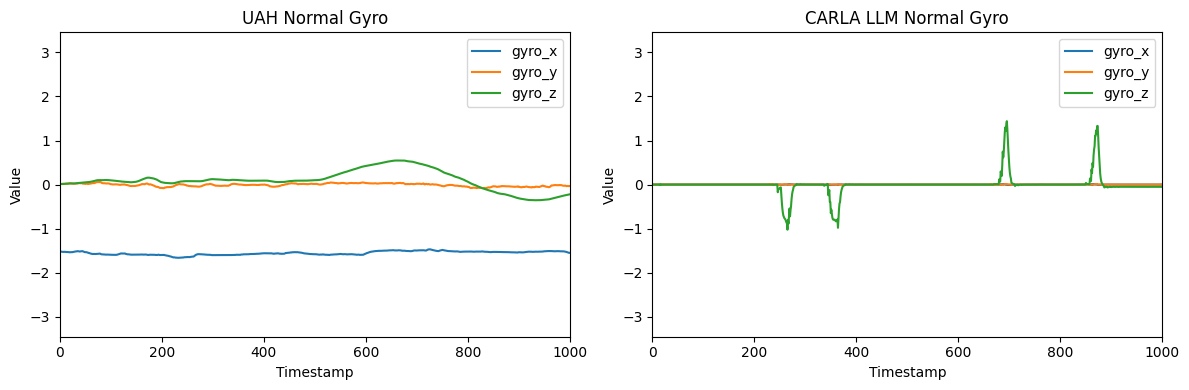

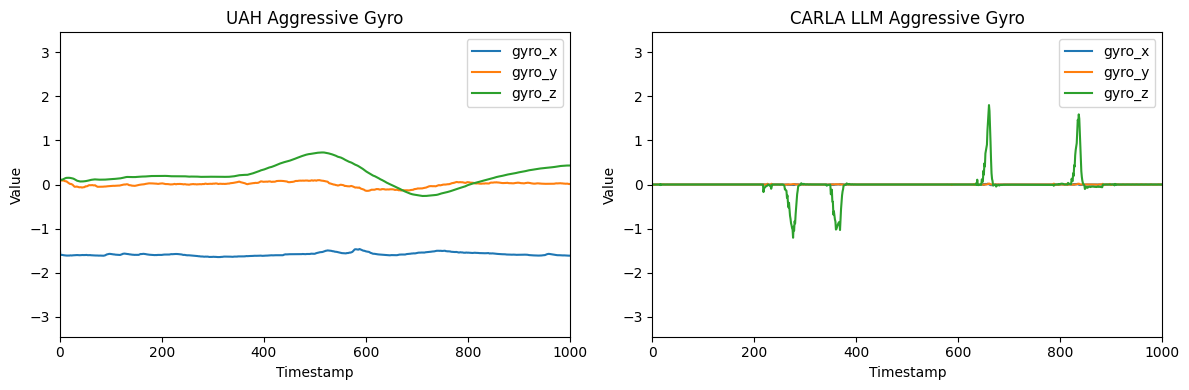

In [179]:
plot_side_by_side(
    uah_normal_data_carla, carla_fixed_normal_data,
    columns=['gyro_x', 'gyro_y', 'gyro_z'],
    xlims=xlims,
    titles=('UAH Normal Gyro', 'CARLA Fixed Normal Gyro'),
    output_path=f'{figs_path}/carla_uah/normal_fixed_gyro.png'
)
plot_side_by_side(
    uah_aggressive_data_carla, carla_fixed_aggressive_data,
    columns=['gyro_x', 'gyro_y', 'gyro_z'],
    xlims=xlims,
    titles=('UAH Aggressive Gyro', 'CARLA Fixed Aggressive Gyro'),
    output_path=f'{figs_path}/carla_uah/aggressive_fixed_gyro.png'
)
plot_side_by_side(
    uah_normal_data_carla, carla_llm_normal_data,
    columns=['gyro_x', 'gyro_y', 'gyro_z'],
    xlims=xlims,
    titles=('UAH Normal Gyro', 'CARLA LLM Normal Gyro'),
    output_path=f'{figs_path}/carla_uah/normal_llm_gyro.png'
)
plot_side_by_side(
    uah_aggressive_data_carla, carla_llm_aggressive_data,
    columns=['gyro_x', 'gyro_y', 'gyro_z'],
    xlims=xlims,
    titles=('UAH Aggressive Gyro', 'CARLA LLM Aggressive Gyro'),
    output_path=f'{figs_path}/carla_uah/aggressive_llm_gyro.png'
)

Angle

Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/normal_fixed_angle.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/aggressive_fixed_angle.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/normal_llm_angle.png
Saving plots to /home/renan/Documents/simulated_driving_behavior/results/figures/merged/Town01/carla_uah/aggressive_llm_angle.png


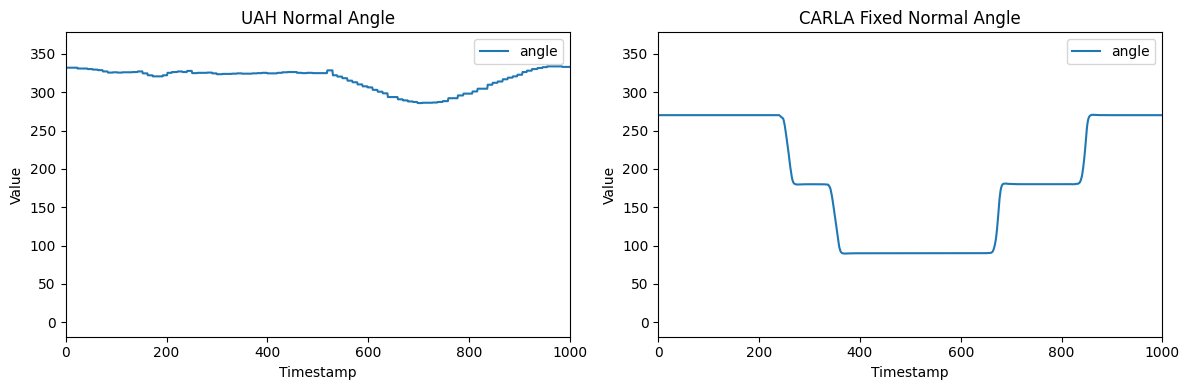

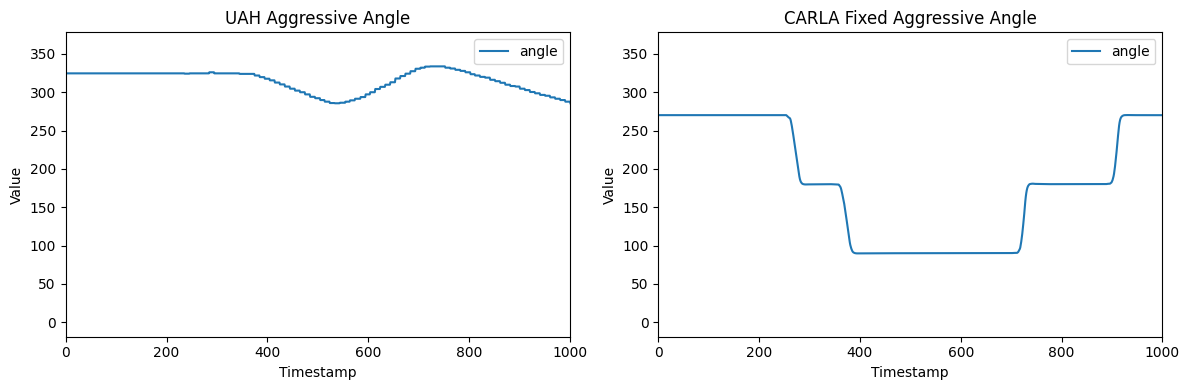

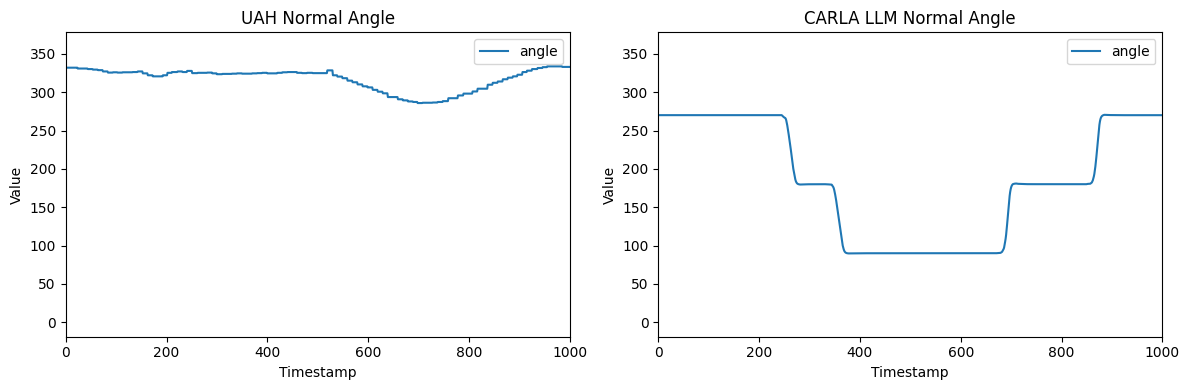

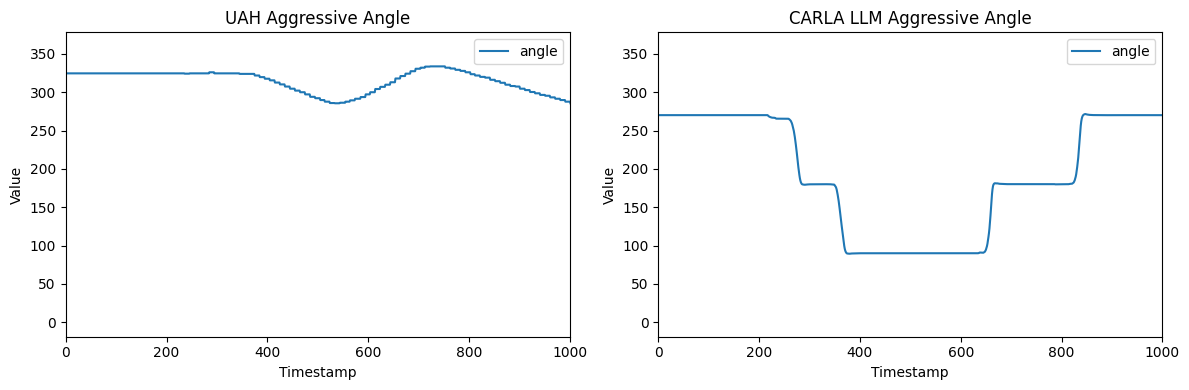

In [180]:
plot_side_by_side(
    uah_normal_data_carla, carla_fixed_normal_data,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Normal Angle', 'CARLA Fixed Normal Angle'),
    output_path=f'{figs_path}/carla_uah/normal_fixed_angle.png'
)
plot_side_by_side(
    uah_aggressive_data_carla, carla_fixed_aggressive_data,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Aggressive Angle', 'CARLA Fixed Aggressive Angle'),
    output_path=f'{figs_path}/carla_uah/aggressive_fixed_angle.png'
)
plot_side_by_side(
    uah_normal_data_carla, carla_llm_normal_data,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Normal Angle', 'CARLA LLM Normal Angle'),
    output_path=f'{figs_path}/carla_uah/normal_llm_angle.png'
)
plot_side_by_side(
    uah_aggressive_data_carla, carla_llm_aggressive_data,
    columns=['angle'],
    xlims=xlims,
    titles=('UAH Aggressive Angle', 'CARLA LLM Aggressive Angle'),
    output_path=f'{figs_path}/carla_uah/aggressive_llm_angle.png'
)